# Variation of CpG beta values in the full dataset vs Tissue vs Clocks

INDEX
1. Compare the mean CpG values of the tissue groups against the full dataset

TO DO:  
find the average of each Cpg in the full dataset  
find the average of each Cpg in the top 100 CpGs dataset  
compare the averages  

### 0. Load libraries

In [1]:
#### LOAD: libraries
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from scipy.stats import wilcoxon
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu ,shapiro, kstest
import dask.dataframe as dd
import itertools

### 1. Load & Prepare the data

In [2]:
#### LOAD: Full methylation dataset
complete_methylation_data = pd.read_csv('GSE223748_datBetaNormalized.csv')

In [3]:
complete_methylation_data.shape

(37554, 15044)

In [4]:
#### LOAD: Metadata
metadata = pd.read_csv('GSE223748_complete_metadata.csv')

In [5]:
#### LOAD: Methylation data for the complete CpGs of each clock
clock1 = pd.read_csv('./Clocks Methylation Data/Clock1_Methylation_data_complete.csv')
clock2 = pd.read_csv('./Clocks Methylation Data/Clock2_Methylation_data_complete.csv')
clock3 = pd.read_csv('./Clocks Methylation Data/Clock3_Methylation_data_complete.csv')
clock2_3 = pd.read_csv('./Clocks Methylation Data/Clock2_3_Overlap_Methylation_data_complete.csv')

clock1_human = pd.read_csv('./Clocks Methylation Data/Clock1_methylation_data_human.csv')
clock2_human = pd.read_csv('./Clocks Methylation Data/Clock2_Methylation_data_human.csv')
clock3_human = pd.read_csv('./Clocks Methylation Data/Clock3_Methylation_data_human.csv')
clock2_3_human = pd.read_csv('./Clocks Methylation Data/Clock2_3_Overlap_Methylation_data_human.csv')

In [6]:
clock1.shape, clock2.shape, clock3.shape, clock2_3.shape

((335, 15044), (816, 15044), (760, 15044), (401, 15044))

In [68]:
clock1.head()

,CpG,202897220093_R01C01,202897220093_R02C01,202897220093_R03C01,202897220093_R04C01,202897220093_R05C01,202897220093_R06C01,202897220093_R01C02,202897220093_R02C02,202897220093_R03C02,...,206139140103_R03C02,206139140103_R04C02,206139140103_R05C02,206139140103_R06C02,206139140104_R01C01,206139140104_R02C01,206139140104_R03C01,206139140104_R04C01,206139140104_R05C01,Mean
0,cg11728741,0.068117,0.067774,0.066174,0.068007,0.068168,0.066324,0.068542,0.067023,0.073910,...,0.094364,0.103115,0.082374,0.109176,0.099880,0.101242,0.098242,0.093631,0.099830,0.139494
1,cg24352905,0.036081,0.051498,0.053750,0.044476,0.052884,0.034006,0.038629,0.034521,0.041215,...,0.052091,0.063619,0.055042,0.054033,0.067906,0.054027,0.054988,0.069833,0.068214,0.080312
2,cg08938156,0.038598,0.035016,0.033070,0.039462,0.036047,0.038373,0.037440,0.034336,0.042841,...,0.151589,0.170453,0.166092,0.125154,0.119996,0.150663,0.141750,0.187928,0.186769,0.197426
3,cg13058338,0.044092,0.042869,0.055642,0.047772,0.048508,0.045878,0.049126,0.045214,0.050714,...,0.039776,0.028211,0.029256,0.024757,0.032184,0.028561,0.029797,0.031891,0.028859,0.074434
4,cg26067250,0.072081,0.073122,0.074480,0.076515,0.072465,0.072201,0.072929,0.072766,0.080162,...,0.087090,0.087236,0.085740,0.080525,0.075837,0.090453,0.088125,0.094802,0.094790,0.091257


In [6]:
#### LOAD: Methylation data for the top 100CpGs of each clock
clock_1_top100CpG = pd.read_csv('./Clocks Methylation Data/Clock1_100_methylation_data_complete.csv')
clock_2_top100CpG = pd.read_csv('./Clocks Methylation Data/Clock2_100_methylation_data_complete.csv')
clock_3_top100CpG = pd.read_csv('./Clocks Methylation Data/Clock3_100_methylation_data_complete.csv')
clock_2_3_top100CpG = pd.read_csv('./Clocks Methylation Data/Clock2_3_Overlap_100_methylation_data_complete.csv')

clock_1_top100CpG_human = pd.read_csv('./Clocks Methylation Data/Clock1_100_methylation_data_human.csv')
clock_2_top100CpG_human = pd.read_csv('./Clocks Methylation Data/Clock2_100_methylation_data_human.csv')
clock_3_top100CpG_human = pd.read_csv('./Clocks Methylation Data/Clock3_100_methylation_data_human.csv')
clock_2_3_top100CpG_human = pd.read_csv('./Clocks Methylation Data/Clock2_3_Overlap_100_methylation_data_human.csv')

In [7]:
#### LOAD: Methylation data for the top 200 CpGs of each clock
clock_1_top200CpG = pd.read_csv('./Clocks Methylation Data/Clock1_200_methylation_data_complete.csv')
clock_2_top200CpG = pd.read_csv('./Clocks Methylation Data/Clock2_200_methylation_data_complete.csv')
clock_3_top200CpG = pd.read_csv('./Clocks Methylation Data/Clock3_200_methylation_data_complete.csv')
clock_2_3_top200CpG = pd.read_csv('./Clocks Methylation Data/Clock2_3_Overlap_200_methylation_data_complete.csv')

clock_1_top200CpG_human = pd.read_csv('./Clocks Methylation Data/Clock1_200_methylation_data_human.csv')
clock_2_top200CpG_human = pd.read_csv('./Clocks Methylation Data/Clock2_200_methylation_data_human.csv')
clock_3_top200CpG_human = pd.read_csv('./Clocks Methylation Data/Clock3_200_methylation_data_human.csv')
clock_2_3_top200CpG_human = pd.read_csv('./Clocks Methylation Data/Clock2_3_Overlap_200_methylation_data_human.csv')

In [10]:
complete_methylation_data.head()

,Unnamed: 0,202897220093_R01C01,202897220093_R02C01,202897220093_R03C01,202897220093_R04C01,202897220093_R05C01,202897220093_R06C01,202897220093_R01C02,202897220093_R02C02,202897220093_R03C02,...,206139140103_R02C02,206139140103_R03C02,206139140103_R04C02,206139140103_R05C02,206139140103_R06C02,206139140104_R01C01,206139140104_R02C01,206139140104_R03C01,206139140104_R04C01,206139140104_R05C01
0,cg00000165,0.480990,0.483132,0.494042,0.505628,0.496484,0.486760,0.497341,0.482591,0.495475,...,0.140734,0.070563,0.060902,0.056785,0.054896,0.218780,0.141689,0.092939,0.085170,0.060552
1,cg00001209,0.934681,0.946624,0.940368,0.935963,0.926762,0.931264,0.941756,0.936942,0.940002,...,0.833588,0.872219,0.900707,0.929456,0.861758,0.828209,0.868502,0.825405,0.907443,0.909347
2,cg00001364,0.911639,0.907298,0.912401,0.901470,0.912350,0.910808,0.911290,0.910110,0.907811,...,0.808296,0.858634,0.840960,0.903902,0.914616,0.778192,0.805107,0.832695,0.889494,0.901459
3,cg00001582,0.060784,0.057917,0.055478,0.064311,0.060102,0.055498,0.056630,0.060347,0.066302,...,0.077506,0.087474,0.081258,0.067971,0.067423,0.069621,0.075440,0.065853,0.074909,0.074081
4,cg00002920,0.655778,0.628036,0.697029,0.690823,0.678101,0.615883,0.638421,0.641940,0.654358,...,0.719434,0.782699,0.701002,0.638727,0.755281,0.776376,0.799998,0.781141,0.698296,0.731993


In [11]:
metadata.head()

,SpeciesCommonName,SpeciesLatinName,Tissue,Sex,Age,Sample,GEO_ID
0,Olive baboon,Papio hamadryas,Cortex,Female,22.12,X202794570001_R01C01,GSM6981727
1,Olive baboon,Papio hamadryas,Cortex,Male,8.04,X202794570001_R01C02,GSM6981733
2,Olive baboon,Papio hamadryas,Cortex,Female,18.95,X202794570001_R02C01,GSM6981728
3,Olive baboon,Papio hamadryas,Cortex,Male,18.64,X202794570001_R02C02,GSM6981734
4,Olive baboon,Papio hamadryas,Cortex,Female,18.61,X202794570001_R03C01,GSM6981729


#### 1.1. Rectify the data:  
- remove the X on the sample names, so to match the metadata 
- rename the first col in the complete methylation df from Unnamed: 0 to Sample

In [8]:
# Drop the X on he the sample names in the metadata
metadata['Sample'] = metadata['Sample'].str.replace('X', '')

In [9]:
# Change Unnamed: 0 to CpG
complete_methylation_data.rename(columns={'Unnamed: 0': 'CpG'}, inplace=True)
complete_methylation_data.head()

,CpG,202897220093_R01C01,202897220093_R02C01,202897220093_R03C01,202897220093_R04C01,202897220093_R05C01,202897220093_R06C01,202897220093_R01C02,202897220093_R02C02,202897220093_R03C02,...,206139140103_R02C02,206139140103_R03C02,206139140103_R04C02,206139140103_R05C02,206139140103_R06C02,206139140104_R01C01,206139140104_R02C01,206139140104_R03C01,206139140104_R04C01,206139140104_R05C01
0,cg00000165,0.480990,0.483132,0.494042,0.505628,0.496484,0.486760,0.497341,0.482591,0.495475,...,0.140734,0.070563,0.060902,0.056785,0.054896,0.218780,0.141689,0.092939,0.085170,0.060552
1,cg00001209,0.934681,0.946624,0.940368,0.935963,0.926762,0.931264,0.941756,0.936942,0.940002,...,0.833588,0.872219,0.900707,0.929456,0.861758,0.828209,0.868502,0.825405,0.907443,0.909347
2,cg00001364,0.911639,0.907298,0.912401,0.901470,0.912350,0.910808,0.911290,0.910110,0.907811,...,0.808296,0.858634,0.840960,0.903902,0.914616,0.778192,0.805107,0.832695,0.889494,0.901459
3,cg00001582,0.060784,0.057917,0.055478,0.064311,0.060102,0.055498,0.056630,0.060347,0.066302,...,0.077506,0.087474,0.081258,0.067971,0.067423,0.069621,0.075440,0.065853,0.074909,0.074081
4,cg00002920,0.655778,0.628036,0.697029,0.690823,0.678101,0.615883,0.638421,0.641940,0.654358,...,0.719434,0.782699,0.701002,0.638727,0.755281,0.776376,0.799998,0.781141,0.698296,0.731993


#### 1.2. Calculate the mean of the CpGs in the datasets and add it?

In [20]:
#### Calculate the mean methylation for each CpG in the complete methylation dataset without overloading the memory and add it to the complete_methylation_data DataFrame

dask_df = dd.from_pandas(complete_methylation_data, npartitions=10)  # Adjust npartitions as needed
complete_methylation_data['Mean'] = dask_df.iloc[:, 1:].mean(axis=1).compute()

In [12]:
# #### Save the complete methylation data with the mean methylation

# complete_methylation_data.to_csv('GSE223748_datBetaNormalized_with_mean.csv', index=False)

In [10]:
#### LOAD: Complete methylation data with the mean methylation

complete_methylation_data_mean = pd.read_csv('GSE223748_datBetaNormalized_with_mean.csv')

In [27]:
# ### Calculate the mean and variance methylation for each CpG in each clock and add it to the respective DataFrame without overloading the memory 

# clocks = [
#     clock1, clock2, clock3, clock2_3, 
#     clock1_human, clock2_human, clock3_human, clock2_3_human, 
#     clock_1_top100CpG, clock_2_top100CpG, clock_3_top100CpG, clock_2_3_top100CpG,
#     clock_1_top100CpG_human, clock_2_top100CpG_human, clock_3_top100CpG_human, clock_2_3_top100CpG_human,
#     clock_1_top200CpG, clock_2_top200CpG, clock_3_top200CpG, clock_2_3_top200CpG,
#     clock_1_top200CpG_human, clock_2_top200CpG_human, clock_3_top200CpG_human, clock_2_3_top200CpG_human
# ]

# clock_names = [
#     'Clock1', 'Clock2', 'Clock3', 'Clock2_3',
#     'Clock1_human', 'Clock2_human', 'Clock3_human', 'Clock2_3_human',
#     'Clock1_top100CpG', 'Clock2_top100CpG', 'Clock3_top100CpG', 'Clock2_3_top100CpG',
#     'Clock1_top100CpG_human', 'Clock2_top100CpG_human', 'Clock3_top100CpG_human', 'Clock2_3_top100CpG_human',
#     'Clock1_top200CpG', 'Clock2_top200CpG', 'Clock3_top200CpG', 'Clock2_3_top200CpG',
#     'Clock1_top200CpG_human', 'Clock2_top200CpG_human', 'Clock3_top200CpG_human', 'Clock2_3_top200CpG_human'
# ]

# # Create a folder to store tissue-specific methylation datasets if it doesn't exist
# folder_name = "Clocks Methylation Data"
# os.makedirs(folder_name, exist_ok=True)

# # Save data with mean and variance in the folder
# for clock_df, clock_name in zip(clocks, clock_names):
#     # create a copy of the clock data, rename it and add the mean and variance
#     clock_df = clock_df.copy() # so it doesn't modify the original DataFrame        

#     # Create a dask DataFrame from the pandas DataFrame
#     dask_df = dd.from_pandas(clock_df, npartitions=10)

#     # Calculate the mean and variance of the methylation data
#     clock_df['Mean'] = dask_df.iloc[:, 1:].mean(axis=1).compute()
#     clock_df['Variance'] = dask_df.iloc[:, 1:].var(axis=1).compute()

#     # Save the tissue-specific methylation dataset as a CSV file
#     file_name = os.path.join(folder_name, f"{clock_name}_methylation_dataset_complete_mean_var.csv")
#     clock_df.to_csv(file_name, index=False)

In [11]:
#### LOAD: clock data with the mean and variance
# Define the folder name
folder_name = "Clocks Methylation Data"

# Initialize lists to store clock DataFrames and their names
clocks = []

# Load clock DataFrames from CSV files and assign them to respective variables
clock_names = [
    'Clock1', 'Clock2', 'Clock3', 'Clock2_3',
    'Clock1_human', 'Clock2_human', 'Clock3_human', 'Clock2_3_human',
    'Clock1_top100CpG', 'Clock2_top100CpG', 'Clock3_top100CpG', 'Clock2_3_top100CpG',
    'Clock1_top100CpG_human', 'Clock2_top100CpG_human', 'Clock3_top100CpG_human', 'Clock2_3_top100CpG_human',
    'Clock1_top200CpG', 'Clock2_top200CpG', 'Clock3_top200CpG', 'Clock2_3_top200CpG',
    'Clock1_top200CpG_human', 'Clock2_top200CpG_human', 'Clock3_top200CpG_human', 'Clock2_3_top200CpG_human'
]

for clock_name in clock_names:
    clock_var_name = f"{clock_name.lower()}_mean_var"  # Creating variable name
    globals()[clock_var_name] = pd.read_csv(os.path.join(folder_name, f"{clock_name}_methylation_dataset_complete_mean_var.csv"))
    clocks.append(globals()[clock_var_name])  # Appending the DataFrame to the list

## note to self: the variables will be called clock1_mean_var, clock2_mean_var, clock3_mean_var, clock2_3_mean_var, etc.

#### 1.3. Create & Load Tissue specific methylation datasets

In [13]:
# Tissues dataframe 

tissues_df = metadata[['Sample', 'Tissue']]
tissues_df

,Sample,Tissue
0,202794570001_R01C01,Cortex
1,202794570001_R01C02,Cortex
2,202794570001_R02C01,Cortex
3,202794570001_R02C02,Cortex
4,202794570001_R03C01,Cortex
...,...,...
15038,204529320081_R02C02,Liver
15039,204529320081_R03C01,Liver
15040,204529320081_R04C01,Liver
15041,204529320081_R04C02,Ear


In [ ]:
# ### Split the Tissues df into tissue specific dataframes
# tissues = tissues_df['Tissue'].unique()

# for tissue in tissues:
#     globals()['{}_df'.format(tissue)] = tissues_df[tissues_df['Tissue'] == tissue].copy()

In [17]:
# ### Filter through the complete methylation data to create tissue-specific datasets and save them as CSV files

# # Create a folder to store tissue-specific methylation datasets if it doesn't exist
# folder_name = "Tissue Methylation Test"
# os.makedirs(folder_name, exist_ok=True)

# # Split the Tissues df into tissue specific dataframes
# tissues = tissues_df['Tissue'].unique()

# # Create tissue-specific dataframes and filter through the complete methylation data
# for tissue in tissues:
#     # Create tissue-specific dataframe
#     tissue_df = tissues_df[tissues_df['Tissue'] == tissue].copy()
    
#     # Get the sample names for the current tissue
#     sample_names = tissue_df['Sample']
    
#     # Filter the complete methylation dataset to include only the samples associated with the current tissue and include the CpGs assoaciated
#     globals()['{}_methylation_dataset'.format(tissue)] = complete_methylation_data[['CpG'] + list(sample_names)]
    
#     # Save the tissue-specific methylation dataset as a CSV file
#     file_name = os.path.join(folder_name, "{}_methylation_dataset.csv".format(tissue))
#     globals()['{}_methylation_dataset'.format(tissue)].to_csv(file_name, index=False) 


In [14]:
#### LOAD: the tissue-specific methylation datasets from the saved CSV files (so the whole script can be run from here) !!!!!

folder_name = "Tissue Methylation"
tissue_files = os.listdir(folder_name) # Get a list of all files in the folder
tissues = tissues_df['Tissue'].unique() # Get a list of all tissues

# Load each CSV file into its own dataframe
for file in tissue_files:
    if file.endswith("_methylation_dataset.csv"):
        # Extract tissue name from file name
        tissue = file.split("_")[0]

        # Load CSV file into dataframe
        file_path = os.path.join(folder_name, file)
        globals()['{}_methylation_dataset'.format(tissue)] = pd.read_csv(file_path)

# Note to self: the variables will be called Blood_methylation_dataset, Brain_methylation_dataset, etc.

In [15]:
Ovaries_methylation_dataset.head()

,CpG,203203210045_R01C01,203203210045_R02C01,204018770013_R01C02,204018770014_R03C02,204018770015_R03C01,204018770017_R03C01,204018770020_R05C01,204018770028_R01C01,204018770028_R05C02,...,204027420009_R01C02,204027420016_R03C01,204027420026_R03C02,204027420030_R01C02,204027420032_R04C01,204027420035_R03C02,204027420038_R03C02,204027420042_R01C02,204027420046_R03C02,204027420049_R01C02
0,cg00000165,0.160560,0.577973,0.166644,0.172046,0.278853,0.120051,0.127616,0.138535,0.165551,...,0.105267,0.143557,0.150309,0.216504,0.119782,0.106384,0.113207,0.141526,0.155172,0.124651
1,cg00001209,0.514740,0.865444,0.588570,0.820677,0.521058,0.810405,0.782320,0.458040,0.516656,...,0.601113,0.543455,0.763688,0.554344,0.321990,0.530514,0.538694,0.657216,0.409836,0.476090
2,cg00001364,0.932420,0.913131,0.862172,0.806801,0.873142,0.874653,0.900738,0.906750,0.914100,...,0.855216,0.849636,0.884428,0.900252,0.882119,0.878890,0.879397,0.931115,0.889782,0.898227
3,cg00001582,0.056534,0.044529,0.071673,0.071631,0.057221,0.064797,0.071677,0.048703,0.062203,...,0.079619,0.052196,0.061972,0.042531,0.061902,0.067801,0.060547,0.059242,0.066381,0.059348
4,cg00002920,0.524103,0.592543,0.183938,0.178292,0.185381,0.105676,0.073372,0.055815,0.054896,...,0.090723,0.153015,0.421372,0.189984,0.059731,0.069872,0.120821,0.061852,0.047330,0.055777


In [58]:
# #### Calculate the mean methylation and variance for each CpG in the tissue-specific datasets and save them as CSV files

# # Create a folder to store tissue-specific methylation datasets if it doesn't exist
# folder_name = "Tissue Methylation"
# os.makedirs(folder_name, exist_ok=True)

# # Calculate the mean methylation for each CpG in each tissue-specific dataset and add it to the respective DataFrame
# for tissue in tissues:
#     # Create a copy of the tissue-specific methylation data, rename it and add the mean and variance
#     globals()['{}_methylation_dataset'.format(tissue)] = globals()['{}_methylation_dataset'.format(tissue)].copy()  # so it doesn't modify the original DataFrame

#     # Convert Pandas DataFrame to Dask DataFrame
#     dask_df = dd.from_pandas(globals()['{}_methylation_dataset'.format(tissue)], npartitions=10)  # Adjust npartitions as needed
    
#     # Calculate the mean and variance of the methylation data
#     globals()['{}_methylation_dataset'.format(tissue)]['Mean'] = dask_df.iloc[:, 1:].mean(axis=1).compute()
#     globals()['{}_methylation_dataset'.format(tissue)]['Variance'] = dask_df.iloc[:, 1:].var(axis=1).compute()

#     # Save the tissue-specific methylation dataset with the mean methylation and variance as a CSV file
#     file_name = os.path.join(folder_name, "{}_methylation_dataset_complete_mean_var.csv".format(tissue))
#     globals()['{}_methylation_dataset'.format(tissue)].to_csv(file_name, index=False)

In [ ]:
# #### LOAD: the tissue-specific methylation datasets with the mean methylation and variance from the saved CSV files

# folder_name = "Tissue Methylation"

# # Initialize a list to store tissue-specific DataFrames
# tissues = []

# # Load tissue-specific DataFrames from CSV files and assign them to respective variables
# for tissue in tissues_df['Tissue'].unique():
#     # Load the tissue-specific DataFrame from the CSV file
#     tissue_var_name = f"{tissue}_mean_var"  # Creating variable name
#     globals()[tissue_var_name] = pd.read_csv(os.path.join(folder_name, f"{tissue}_methylation_dataset_complete_mean_var.csv"))
#     tissues.append(globals()[tissue_var_name])  # Appending the DataFrame to the list

# # Note to self: the variables will be called liver_mean_var, kidney_mean_var, etc.


In [16]:
#### LOAD: the tissue-specific methylation datasets with the mean methylation and variance from the saved CSV files

folder_name = "Tissue Methylation"

# Load tissue-specific DataFrames from CSV files and assign them to respective variables
for tissue in tissues_df['Tissue'].unique():
    # Load the tissue-specific DataFrame from the CSV file
    tissue_var_name = f"{tissue}_mean_var"  # Creating variable name
    globals()[tissue_var_name] = pd.read_csv(os.path.join(folder_name, f"{tissue}_methylation_dataset_complete_mean_var.csv"))

# Note to self: the variables will be called liver_mean_var, kidney_mean_var, etc.

In [19]:
Blood_mean_var.head()

,CpG,202794570002_R01C02,202794570002_R03C02,202794570002_R04C02,202794570002_R05C02,202794570002_R06C01,202794570002_R06C02,202794570020_R01C01,202794570020_R01C02,202794570020_R02C01,...,205987790065_R04C02,205987790065_R05C01,205987790065_R05C02,205987790065_R06C01,205987790065_R06C02,206139140104_R01C02,206139140104_R02C02,206139140104_R06C01,Mean,Variance
0,cg00000165,0.480598,0.480727,0.471287,0.491907,0.470413,0.494566,0.481661,0.491640,0.480910,...,0.401268,0.364609,0.347046,0.355744,0.369246,0.486253,0.495817,0.494882,0.217164,0.028577
1,cg00001209,0.949652,0.920081,0.939281,0.882610,0.945128,0.936300,0.946920,0.938225,0.923380,...,0.825651,0.884960,0.877434,0.903645,0.887097,0.930023,0.867957,0.863826,0.885492,0.005695
2,cg00001364,0.893691,0.866378,0.903879,0.855325,0.894495,0.898212,0.884243,0.904272,0.892112,...,0.861802,0.893173,0.897086,0.889955,0.894398,0.853597,0.878107,0.871956,0.873732,0.014764
3,cg00001582,0.046624,0.050458,0.050236,0.053441,0.046996,0.049230,0.043981,0.050063,0.047062,...,0.054473,0.056021,0.055213,0.056673,0.058086,0.025566,0.036963,0.030652,0.049026,0.000291
4,cg00002920,0.112284,0.150901,0.133024,0.127054,0.129705,0.134837,0.138700,0.109279,0.142278,...,0.062335,0.056261,0.055913,0.063233,0.062313,0.498621,0.489322,0.506145,0.530168,0.095503


In [158]:
# Create a data frame with the name of the tissue datastets and the number of samples in each dataset
tissue_sample_count = []

for tissue in tissues:
    sample_count = globals()['{}_methylation_dataset'.format(tissue)].shape[1]
    tissue_sample_count.append({'Tissue': tissue, 'Sample Count': sample_count})

tissue_sample_count_df = pd.DataFrame(tissue_sample_count)

# Sort the data frame by sample count in descending order
tissue_sample_count_df.sort_values(by='Sample Count', ascending=False, inplace=True)
tissue_sample_count_df

,Tissue,Sample Count
2,Blood,4555
3,Skin,2755
1,Liver,2157
20,Ear,770
0,Cortex,715
...,...,...
41,Larynx,3
35,MitralValve,3
51,Dermis,2
11,Thyroid,2


In [159]:
# Select the following tissues in the tissue sample count df: Aorta, Bladder, Cartilage, Crypts, Gut, Kidney, Oocytes, Pancreas, Villi
tissue_sample_count_df[tissue_sample_count_df['Tissue'].isin(['Bladder','Kidney', 'Oocyte', 'Villi'])]

,Tissue,Sample Count
8,Kidney,328
52,Oocyte,81
26,Bladder,16
65,Villi,11


In [160]:
#### filter through tissue sample count df and select only tissues with less than 3 samples
# tissue_sample_count_df[tissue_sample_count_df['Sample Count'] < 3]

### 2. Compare the mean CpG beta values

#### 2.1 Compare the mean beta value of each CpG in the full dataset with the mean beta value of each tissue in the tissue specific datasets.

##### 2.1.1. Check the distribution of the mean beta values of the CpGs in the full dataset and the tissue specific datasets

In [16]:
# # Checking if the COMPLETE methylation data is normally distributed using the Shapiro-Wilk and the Kolmogorov-Smirnov test

# # make a copy of the complete methylation data without the first and last columns (CpG and Mean)
# complete_methylation_data_copy = complete_methylation_data.iloc[:,1:-1].copy()

# # Convert the copy to a Dask DataFrame to avoid memory overload
# dask3_df = dd.from_pandas(complete_methylation_data_copy, npartitions=10)

# shapiro_stat, shapiro_p = shapiro(dask3_df)
# ks_stat, ks_p = kstest(dask3_df, 'norm')
# # Calculate summary statistics from the arrays generated by the Kolmogorov-Smirnov test
# ks_stat_summary = np.max(ks_stat)
# ks_p_summary = np.max(ks_p)

# print(f'The Shapiro-Wilk test statistic is {shapiro_stat} and the p-value is {shapiro_p}')
# print(f'The Kolmogorov-Smirnov test statistic is {ks_stat_summary} and the p-value is {ks_p_summary}')

C:\Users\Catia Antunes\AppData\Local\Temp\ipykernel_8176\3856885881.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 564924822.
  shapiro_stat, shapiro_p = shapiro(dask3_df)


The Shapiro-Wilk test statistic is 0.877909275208784 and the p-value is 2.8328101841452437e-87
The Kolmogorov-Smirnov test statistic is 0.5097103189192183 and the p-value is 0.0


In [21]:
# # Checking if the TISSUE methylation datasets are normally distributed. Because the dataset is large, we'll use both the Shapiro-Wilk test and the Kolmogorov-Smirnov test.

# # The Shapiro-Wilk test is more powerful for small sample sizes, while the Kolmogorov-Smirnov test is more powerful for large sample sizes. 
# # We'll use both tests to ensure that the results are consistent.

# # Get the list of unique tissues
# tissues = tissues_df['Tissue'].unique()

# # Create an empty list to store normality test results
# normality_results = []

# # Loop through each tissue-specific dataset
# for tissue in tissues:
#     # Extract the tissue-specific dataset
#     dataset = globals()['{}_methylation_dataset'.format(tissue)].iloc[:, 1:-1] # from the second column to the second last column because the last column is the mean
    
#     # Check if the dataset has at least 3 data points and skip the rest of the analysis if it doesn't   
#     if len(dataset.columns) < 3:
#         normality_results.append({'Tissue': tissue, 'Shapiro-Wilk test stat': 'N/A', 'Shappiro-Wilk P-value': 'N/A', 'Kolmogorov-Smirnov test stat': 'N/A', 'Kolmogorov-Smirnov P-value': 'N/A'})
#         continue
    
#     # Suppress specific warning
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
        
#         # Perform Shapiro-Wilk test for normality if dataset has at least 3 data points
#         shapiro_stat, shapiro_p = shapiro(dataset)
    
#     # Perform Kolmogorov-Smirnov test for normality against the normal distribution
#     ks_stat, ks_p = kstest(dataset, 'norm')
    
#     # Calculate summary statistics from the arrays generated by the Kolmogorov-Smirnov test
#     ks_stat_summary = np.max(ks_stat)
#     ks_p_summary = np.max(ks_p)
    
#     # Append normality test results to the list
#     normality_results.append({'Tissue': tissue, 'Shapiro-Wilk test stat': shapiro_stat, 'Shappiro-Wilk P-value': shapiro_p, 'Kolmogorov-Smirnov test stat': ks_stat_summary, 'Kolmogorov-Smirnov P-value': ks_p_summary})

# normality_results_df = pd.DataFrame(normality_results)

# normality_results_df.head()

,Tissue,Shapiro-Wilk test stat,Shappiro-Wilk P-value,Kolmogorov-Smirnov test stat,Kolmogorov-Smirnov P-value
0,Cortex,0.896878,0.0,0.503303,0.0
1,Liver,0.884535,0.0,0.506721,0.0
2,Blood,0.838886,0.0,0.508058,0.0
3,Skin,0.887628,0.0,0.50971,0.0
4,Muscle,0.905881,0.0,0.506578,0.0


In [22]:
# # Check how many of the datasets are normally distributed based on the Shapiro-Wilk test and the Kolmogorov-Smirnov tests

# # Make a copy of the normality results dataframe
# normality_results_df_copy = normality_results_df.copy()

# # Drop rows with missing values
# normality_results_df_copy.dropna(inplace=True)

# # Check if there are still missing values
# if normality_results_df_copy.isnull().any().all():
#     print("There are still missing values in the normality test results. Please check the data and rerun the analysis.")
    
# else:
#     # Convert columns to float
#     normality_results_df_copy['Shappiro-Wilk P-value'] = pd.to_numeric(normality_results_df_copy['Shappiro-Wilk P-value'], errors='coerce')
#     normality_results_df_copy['Kolmogorov-Smirnov P-value'] = pd.to_numeric(normality_results_df_copy['Kolmogorov-Smirnov P-value'], errors='coerce')

#     # Drop rows with NaN values
#     normality_results_df_copy.dropna(subset=['Shappiro-Wilk P-value', 'Kolmogorov-Smirnov P-value'], inplace=True)

#     # Count the number of tissues that are normally distributed based on the Shapiro-Wilk test
#     shapiro_normal_tissues = len(normality_results_df_copy[normality_results_df_copy['Shappiro-Wilk P-value'] >= 0.05]) # a p-value > 0.05 indicates normality

#     # Count the number of tissues that are normally distributed based on the Kolmogorov-Smirnov test
#     ks_normal_tissues = len(normality_results_df_copy[normality_results_df_copy['Kolmogorov-Smirnov P-value'] >= 0.05]) # a p-value > 0.05 indicates normality

#     print("Number of tissues that are normally distributed based on the Shapiro-Wilk test:", shapiro_normal_tissues)  
#     print("Number of tissues that are normally distributed based on the Kolmogorov-Smirnov test:", ks_normal_tissues)



Number of tissues that are normally distributed based on the Shapiro-Wilk test: 0
Number of tissues that are normally distributed based on the Kolmogorov-Smirnov test: 0


##### 2.1.2. Now that we have checked the datasets are not normally distributed, we can use the Mann-Whitney U test to compare the mean beta values of the CpGs in the full dataset with the mean beta values of the CpGs in the tissue specific datasets.

In [91]:
complete_methylation_data.iloc[:,1:]

,202897220093_R01C01,202897220093_R02C01,202897220093_R03C01,202897220093_R04C01,202897220093_R05C01,202897220093_R06C01,202897220093_R01C02,202897220093_R02C02,202897220093_R03C02,202897220093_R04C02,...,206139140103_R03C02,206139140103_R04C02,206139140103_R05C02,206139140103_R06C02,206139140104_R01C01,206139140104_R02C01,206139140104_R03C01,206139140104_R04C01,206139140104_R05C01,Mean
0,0.480990,0.483132,0.494042,0.505628,0.496484,0.486760,0.497341,0.482591,0.495475,0.492543,...,0.070563,0.060902,0.056785,0.054896,0.218780,0.141689,0.092939,0.085170,0.060552,0.297239
1,0.934681,0.946624,0.940368,0.935963,0.926762,0.931264,0.941756,0.936942,0.940002,0.937634,...,0.872219,0.900707,0.929456,0.861758,0.828209,0.868502,0.825405,0.907443,0.909347,0.824033
2,0.911639,0.907298,0.912401,0.901470,0.912350,0.910808,0.911290,0.910110,0.907811,0.897527,...,0.858634,0.840960,0.903902,0.914616,0.778192,0.805107,0.832695,0.889494,0.901459,0.838070
3,0.060784,0.057917,0.055478,0.064311,0.060102,0.055498,0.056630,0.060347,0.066302,0.063448,...,0.087474,0.081258,0.067971,0.067423,0.069621,0.075440,0.065853,0.074909,0.074081,0.057634
4,0.655778,0.628036,0.697029,0.690823,0.678101,0.615883,0.638421,0.641940,0.654358,0.688512,...,0.782699,0.701002,0.638727,0.755281,0.776376,0.799998,0.781141,0.698296,0.731993,0.521763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37549,0.478933,0.477256,0.493799,0.505229,0.476187,0.489575,0.492451,0.493136,0.495317,0.477278,...,0.467388,0.469152,0.485811,0.480770,0.465140,0.464936,0.467297,0.459547,0.464044,0.462077
37550,0.626849,0.605927,0.593790,0.600432,0.568832,0.566150,0.605217,0.592838,0.586239,0.573028,...,0.973583,0.975439,0.972794,0.967895,0.972551,0.974331,0.977281,0.977291,0.976834,0.502738
37551,0.478960,0.511858,0.486963,0.501462,0.508603,0.508566,0.501210,0.509721,0.500000,0.497980,...,0.038226,0.037335,0.041075,0.043426,0.041685,0.035711,0.037678,0.037126,0.035100,0.463943
37552,0.516974,0.509821,0.495449,0.509107,0.501258,0.509925,0.507019,0.502206,0.500000,0.500000,...,0.899064,0.911501,0.901207,0.853029,0.890348,0.902306,0.905690,0.913989,0.907274,0.496160


note to self, added welch's test here, need to re-plot plots

In [66]:
### Compare the mean methylation values between the complete dataset and each tissue-specific dataset using Pearson correlation, t-test, and Mann-Whitney U test

# Create an empty list to store comparison results
comparison_results = []

# Loop through each tissue-specific dataset
for tissue in tissues:
    # Get the mean for each tissue
    tissue_mean = globals()['{}_mean_var'.format(tissue)]['Mean']

    # Calculate Pearson correlation coefficient between the mean methylation values of the complete dataset and the tissue-specific dataset
    correlation = complete_methylation_data['Mean'].corr(tissue_mean)
    
    # Perform t-test to assess the significance of the difference in mean methylation values between the complete dataset and the tissue-specific dataset
    t_statistic, p_value_ttest = ttest_ind(complete_methylation_data['Mean'], tissue_mean)
    
    # Perform Mann-Whitney U test to assess the significance of the difference in mean methylation values between the complete dataset and the tissue-specific dataset
    u_statistic, p_value_mannwhitneyu = mannwhitneyu(complete_methylation_data['Mean'], tissue_mean)

    # Perform a Welch's t-test to assess the significance of the difference in mean methylation values between the complete dataset and the tissue-specific dataset
    t_statistic, p_value_ttest = ttest_ind(complete_methylation_data['Mean'], tissue_mean, equal_var=False)
    
    # Append comparison results to the list
    comparison_results.append({'Tissue': tissue, 
                               'Pearsons Correlation': correlation, 
                               'P-value (t-test)': p_value_ttest, 
                               'P-value (Mann-Whitney U test)': p_value_mannwhitneyu,
                               'P-value (Welch\'s t-test)': p_value_ttest})

# Convert the list of dictionaries to a DataFrame
comparison_results_df = pd.DataFrame(comparison_results)

# sort by P-value (t-test) in ascending order
comparison_results_df.sort_values(by='P-value (Mann-Whitney U test)', ascending=True, inplace=True)

# Print or further analyze the comparison results
comparison_results_df


,Tissue,Pearsons Correlation,P-value (t-test),P-value (Mann-Whitney U test),P-value (Welch's t-test)
13,LymphNode,0.900595,1.637579e-141,0.000000e+00,1.637579e-141
7,Testis,0.775442,6.420681e-88,0.000000e+00,6.420681e-88
51,Dermis,0.893712,8.358367e-60,1.285027e-268,8.358367e-60
23,Pituitary,0.821857,4.010429e-274,1.993292e-260,4.010429e-274
57,MacrophageBoneMarrow,0.858099,1.544276e-42,2.511470e-255,1.544276e-42
...,...,...,...,...,...
26,Bladder,0.843158,2.830816e-29,6.664837e-02,2.830816e-29
52,Oocyte,0.832844,1.486515e-30,1.447080e-01,1.486515e-30
65,Villi,0.881673,8.540348e-21,2.959821e-01,8.540348e-21
8,Kidney,0.950814,1.746624e-06,3.346988e-01,1.746624e-06


In [67]:
# Check which tissues have NaN values in the comparison results
comparison_results_df[comparison_results_df.isnull().any(axis=1)]


,Tissue,Pearsons Correlation,P-value (t-test),P-value (Mann-Whitney U test),P-value (Welch's t-test)


In [23]:
## Drop rows with missing values
comparison_results_df = comparison_results_df.dropna(inplace=False)

In [71]:
# Count the number of tissues with the P-value less than 0.05 in each of the tests
p_value_ttest = len(comparison_results_df[comparison_results_df['P-value (t-test)'] < 0.05])
p_value_mannwhitneyu = len(comparison_results_df[comparison_results_df['P-value (Mann-Whitney U test)'] < 0.05])
p_value_welch = len(comparison_results_df[comparison_results_df['P-value (Welch\'s t-test)'] < 0.05])

# table with the number of tissues with P-value less than 0.05 in each of the tests
p_value_table = pd.DataFrame({'T-test': p_value_ttest, 'Mann-Whitney U test': p_value_mannwhitneyu, 'Welch\'s t-test': p_value_welch}, index=[0])
p_value_table


,T-test,Mann-Whitney U test,Welch's t-test
0,62,65,62


In [68]:
# Count the number of Tissues for which the P-value (Mann-Whitney U Test) is less than 0.05
significant_tissues = comparison_results_df[comparison_results_df['P-value (Mann-Whitney U test)'] <= 0.05].shape[0]
significant_tissues

65

In [26]:
# List of tissues with significant differences in mean methylation values compared to the complete dataset
significant_tissues_list = comparison_results_df[comparison_results_df['P-value (Mann-Whitney U test)'] <= 0.05]['Tissue'].tolist()
significant_tissues_list


['LymphNode',
 'Testis',
 'Dermis',
 'Pituitary',
 'MacrophageBoneMarrow',
 'Epidermis',
 'iPSC',
 'Fibroblast',
 'MacrophagePeritoneal',
 'Hippocampus',
 'Blood',
 'Keratinocyte',
 'Placenta',
 'Fetus',
 'Tail',
 'MitralValve',
 'Jejunum',
 'BoneMarrow',
 'Ileum',
 'HematopoieticStem.Progenitor.LSK',
 'Neocortex',
 'Thyroid',
 'Mammary',
 'Tendon',
 'Astrocyte',
 'Cecum',
 'Brain',
 'Spleen',
 'Substantia nigra',
 'Ovaries',
 'Sacrocaudalis',
 'Larynx',
 'TemporalCortex',
 'Duodenum',
 'Suspensory',
 'AdrenalCortex',
 'EndothelialCell',
 'ParietalCortex',
 'WholeBrain',
 'Muscle',
 'Hypothalamus',
 'Lamina',
 'Ear',
 'DifferentiatedBloodCells',
 'Lung',
 'OccipitalCortex',
 'SpinalCord',
 'Blubber',
 'Cerebellum',
 'Adipose',
 'Striatum',
 'Heart',
 'Pancreas',
 'Cortex',
 'Skin',
 'Uterus',
 'SVZ',
 'Maybe.Larynx',
 'Liver',
 'ES',
 'FrontalCortex',
 'Aorta',
 'HematopoieticStemCells',
 'Crypts',
 'Gut']

In [98]:
## Check which tissues are not in the significant tissues list  
tissues_not_significant = [tissue for tissue in tissues if tissue not in significant_tissues_list]
tissues_not_significant

# It was printing 7 tissues instead of 4 (Dermis, Thyroid and Testis should not appear)

['Kidney', 'Bladder', 'Cartilage', 'Oocyte', 'Villi']

The Mann-Whitney test revealed a significant distinction in the mean beta values between 63 (out of 67) tissues and the overall dataset. 
The mean beta values of the CpGs in the full dataset were significantly different from the mean beta values of the CpGs in the tissue-specific datasets.

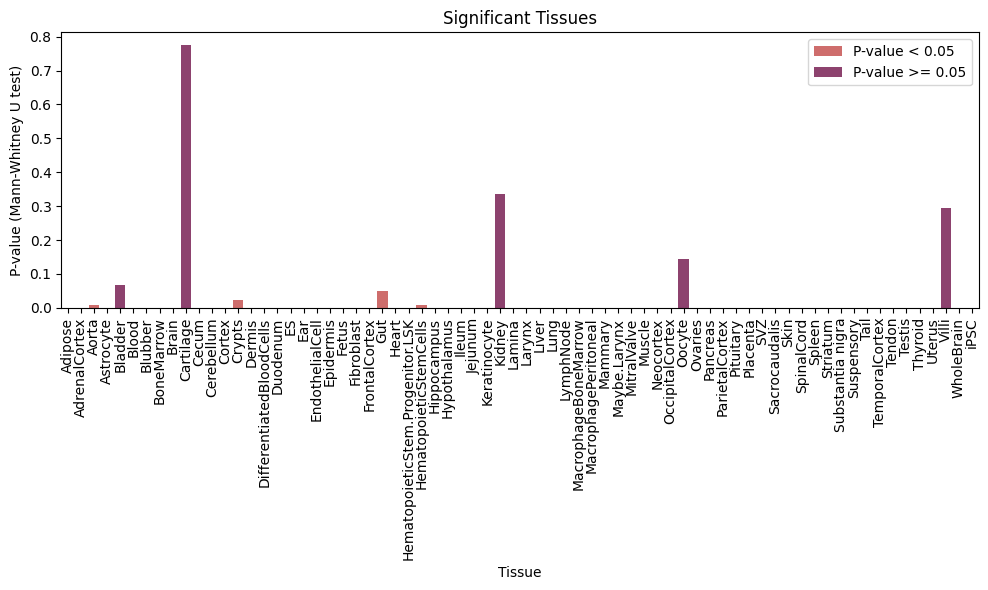

In [80]:
# 1. Bar Plot for Significant Tissues (Man-Whitney U Test only)

# Sort the dataframe by 'Tissue' column
comparison_results_df_sorted = comparison_results_df.sort_values(by='Tissue')

# Define color pallete
sns.color_palette("dark:#5A9_r", as_cmap=True)
sns.color_palette("flare", as_cmap=True)


# define hue based on p-value threshold for the sorted dataframe
hue = np.where(comparison_results_df_sorted['P-value (Mann-Whitney U test)'] <= 0.05, 'P-value < 0.05', 'P-value >= 0.05')

# Bar Plot for Significant Tissues
plt.figure(figsize=(10, 6))
sns.barplot(x='Tissue', y='P-value (Mann-Whitney U test)', data=comparison_results_df_sorted, hue=hue, palette="flare")
plt.title('Significant Tissues')
plt.xlabel('Tissue')
plt.ylabel('P-value (Mann-Whitney U test)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

PLOTS DONT HAVE THE SAME COLORS FOR SOME FUUUUUUCKING REASON --- SORT THIS SHIT

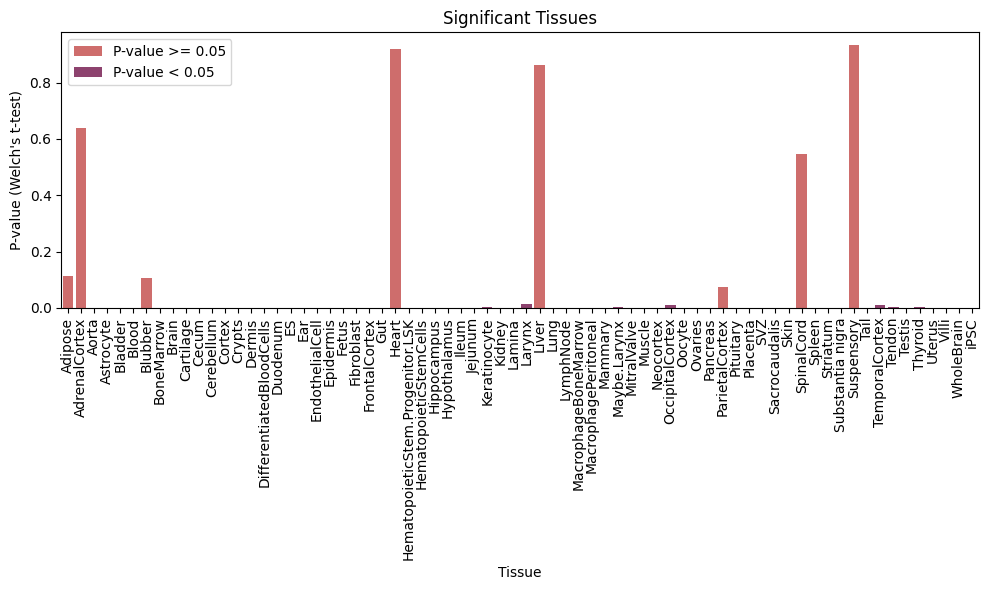

In [87]:
# 1. Bar Plot for Significant Tissues (Man-Whitney U Test only)

# Sort the dataframe by 'Tissue' column
comparison_results_df_sorted = comparison_results_df.sort_values(by='Tissue')

# Define color pallete
sns.color_palette("dark:#5A9_r", as_cmap=True)
sns.color_palette("flare", as_cmap=True)


# define hue based on p-value threshold for the sorted dataframe
hue = np.where(comparison_results_df_sorted['P-value (Welch\'s t-test)'] <= 0.05, 'P-value < 0.05', 'P-value >= 0.05')

# Bar Plot for Significant Tissues
plt.figure(figsize=(10, 6))
sns.barplot(x='Tissue', y='P-value (Welch\'s t-test)', data=comparison_results_df_sorted, hue=hue, palette='flare')
plt.title('Significant Tissues')
plt.xlabel('Tissue')
plt.ylabel('P-value (Welch\'s t-test)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [105]:
# print the tissues with a p-value higher than 0 and show only the man-whitney u test p-value
comparison_results_df[comparison_results_df['P-value (Mann-Whitney U test)'] > 0.05][['Tissue', 'P-value (Mann-Whitney U test)']]


,Tissue,P-value (Mann-Whitney U test)
26,Bladder,0.066648
52,Oocyte,0.144708
65,Villi,0.295982
8,Kidney,0.334699
45,Cartilage,0.774004


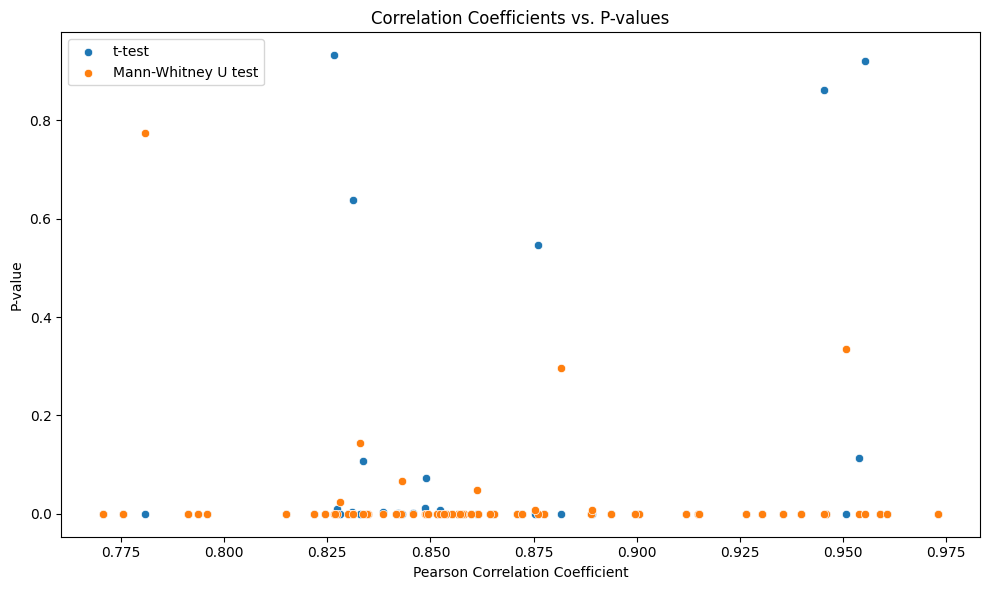

In [101]:
# 2. Scatter Plot for Correlation Coefficients and P-values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pearsons Correlation', y='P-value (t-test)', data=comparison_results_df, label='t-test')
sns.scatterplot(x='Pearsons Correlation', y='P-value (Mann-Whitney U test)', data=comparison_results_df, label='Mann-Whitney U test')
plt.title('Correlation Coefficients vs. P-values')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('P-value')
plt.legend()
plt.tight_layout()
plt.show()

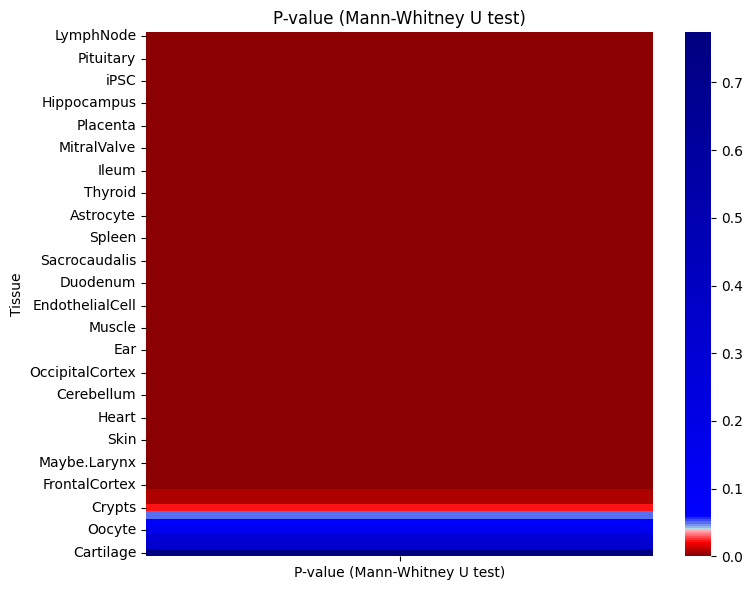

In [102]:
# 4. Heatmap for P-values condensed

# Define custom colormap with gradient from blue to red
cmap_colors = [(0, 'darkred'), (0.025, 'red'), (0.05, 'pink'), 
               (0.051, 'lightblue'), (0.075, 'blue'), (1, 'navy')]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

p_values_df = comparison_results_df[['P-value (Mann-Whitney U test)']].copy()
p_values_df.index = comparison_results_df['Tissue']
plt.figure(figsize=(8, 6))
sns.heatmap(p_values_df, annot=False, cmap=cmap, fmt=".2g")
plt.title('P-value (Mann-Whitney U test)')
plt.tight_layout()
plt.show()

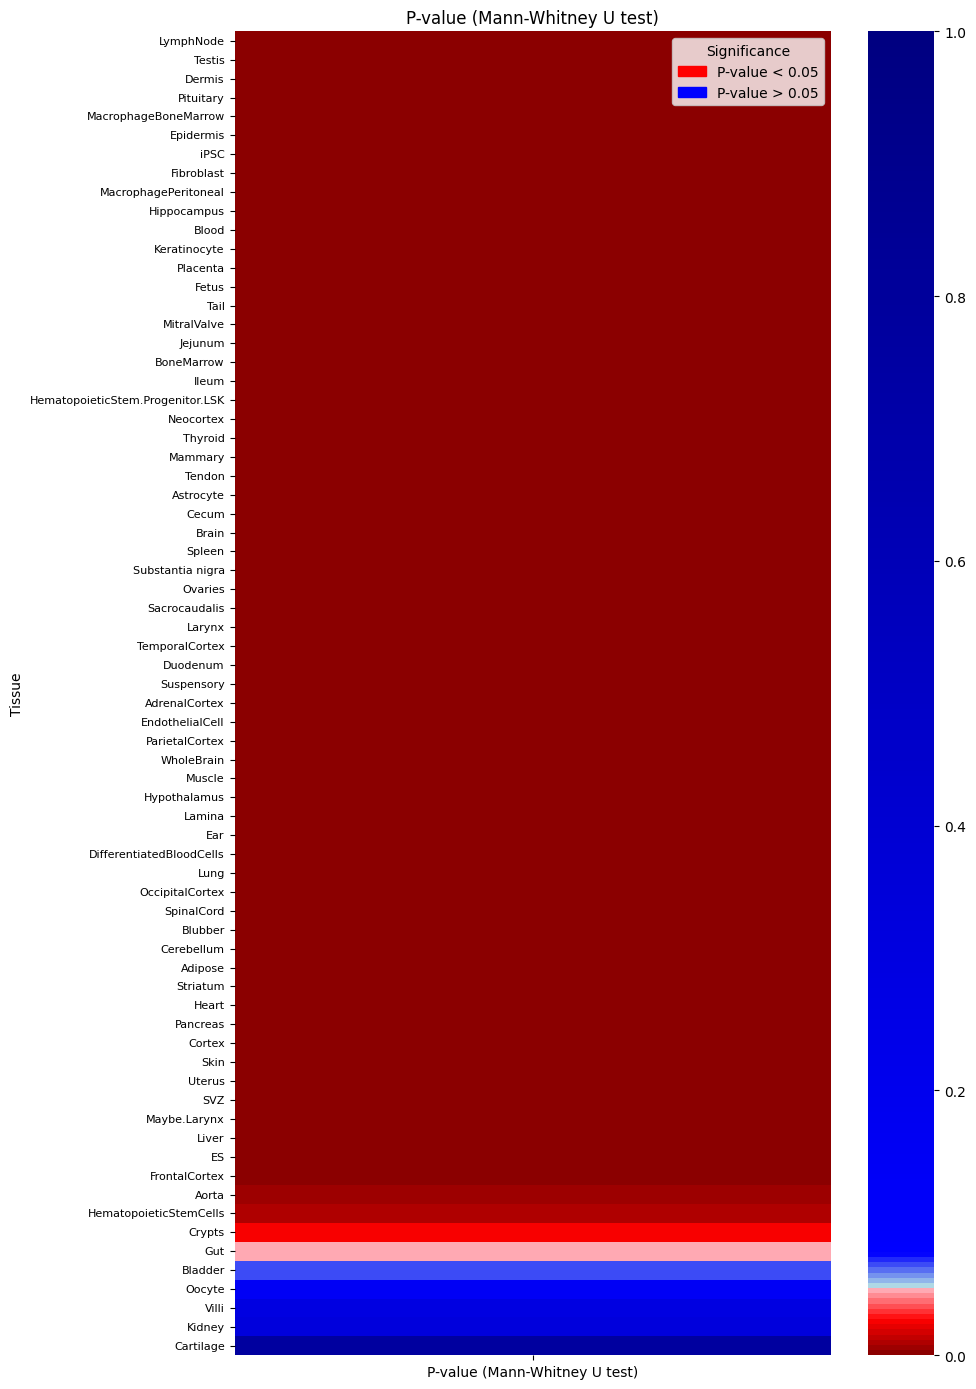

In [103]:
# 5. Heatmap for P-values with all tissues

# Define custom colormap with gradient from blue to red
cmap_colors = [(0, 'darkred'), (0.025, 'red'), (0.05, 'pink'), 
               (0.051, 'lightblue'), (0.075, 'blue'), (1, 'navy')]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

# Copy the p-values dataframe and set tissue names as index
p_values_df = comparison_results_df[['P-value (Mann-Whitney U test)']].copy()
p_values_df.index = comparison_results_df['Tissue']

# Adjust the figure size to accommodate all tissue names
plt.figure(figsize=(10, len(p_values_df) * 0.2))

# Create the heatmap
sns.heatmap(p_values_df, cmap=cmap, annot=False, fmt=".2f", cbar=True, vmin=0, vmax=1)

# Create a legend for the color gradient (p-value > 0.05 Blue, p-value < 0.05 Red)
red_patch = mpatches.Patch(color='red', label='P-value < 0.05')
blue_patch = mpatches.Patch(color='blue', label='P-value > 0.05')
plt.legend(handles=[red_patch, blue_patch], title='Significance', loc='upper right')

# Set the y-axis tick labels font size and rotation
plt.yticks(rotation=0, fontsize=8)

# Add title and adjust layout
plt.title('P-value (Mann-Whitney U test)')
plt.tight_layout()

# Show the plot
plt.show()


#### 2.2 Compare the mean beta value of each CpG in the full dataset with the mean beta value of each CpG in the Clocks  --- INCORRECT

check if by applying welch's test, this works

In [162]:
### Compare the mean methylation values between the complete dataset and each clock dataset using Pearson correlation, t-test, and Mann-Whitney U test

# Load the clocks
clocks = [clock1, clock2, clock3, clock2_3, 
          clock_1_top100CpG, clock_2_top100CpG, clock_3_top100CpG, clock_2_3_top100CpG, 
          clock_1_top200CpG, clock_2_top200CpG, clock_3_top200CpG, clock_2_3_top200CpG
          ]
clock_names = ['Clock1', 'Clock2', 'Clock3', 'Clock2_3', 
                'Clock1_Top100', 'Clock2_Top100', 'Clock3_Top100', 'Clock2_3_Top100', 
                'Clock1_Top200', 'Clock2_Top200', 'Clock3_Top200', 'Clock2_3_Top200'
                ]

# Create an empty list to store comparison results
clocks_comparison_results = []

# Loop through each clock dataset
for clock, clock_name in zip(clocks, clock_names):
    # Calculate the mean methylation value for each CpG site in the clock dataset
    clock_mean = clock.iloc[:, 1:].mean(axis=1)
    
    # Calculate Pearson correlation coefficient between the mean methylation values of the complete dataset and the clock dataset
    correlation = complete_methylation_data['Mean'].corr(clock_mean)
    
    # Perform t-test to assess the significance of the difference in mean methylation values between the complete dataset and the clock dataset
    t_statistic, p_value_ttest = ttest_ind(complete_methylation_data['Mean'], clock_mean)
    
    # Perform Mann-Whitney U test to assess the significance of the difference in mean methylation values between the complete dataset and the clock dataset
    u_statistic, p_value_mannwhitneyu = mannwhitneyu(complete_methylation_data['Mean'], clock_mean)
    
    # Append comparison results to the list
    clocks_comparison_results.append({'Clock': clock_name, 'Pearsons Correlation': correlation, 'P-value (t-test)': p_value_ttest, 'P-value (Mann-Whitney U test)': p_value_mannwhitneyu})

# Convert the list of dictionaries to a DataFrame
clocks_comparison_results_df = pd.DataFrame(clocks_comparison_results)

# sort by P-value (Mann-Whitney U test) in ascending order
clocks_comparison_results_df.sort_values(by='P-value (Mann-Whitney U test)', ascending=True, inplace=True)

# Print or further analyze the comparison results
clocks_comparison_results_df[["Clock", "P-value (Mann-Whitney U test)"]]


,Clock,P-value (Mann-Whitney U test)
0,Clock1,0.000002
4,Clock1_Top100,0.003029
2,Clock3,0.005014
1,Clock2,0.012592
8,Clock1_Top200,0.036667
11,Clock2_3_Top200,0.050504
9,Clock2_Top200,0.096549
10,Clock3_Top200,0.141237
5,Clock2_Top100,0.205852
7,Clock2_3_Top100,0.212128


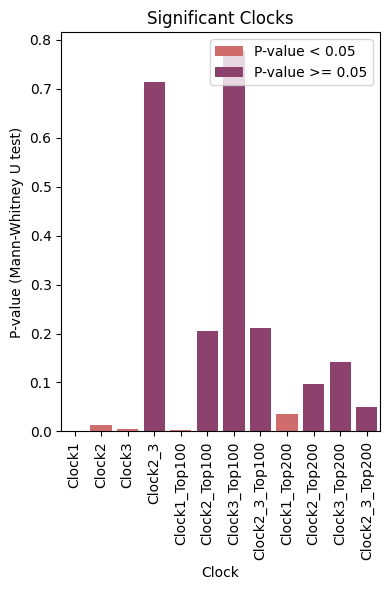

In [163]:
# 1. Bar Plot for Significant Clocks

# Order the clocks for the bar plot
ordered_clocks = ['Clock1', 'Clock2', 'Clock3', 'Clock2_3', 
                    'Clock1_Top100', 'Clock2_Top100', 'Clock3_Top100', 'Clock2_3_Top100', 
                    'Clock1_Top200', 'Clock2_Top200', 'Clock3_Top200', 'Clock2_3_Top200']

clocks_comparison_results_df_sorted = clocks_comparison_results_df.copy()
clocks_comparison_results_df_sorted['Clock'] = pd.Categorical(clocks_comparison_results_df_sorted['Clock'], categories=ordered_clocks, ordered=True)

# Define hue based on p-value threshold for the sorted dataframe
hue = np.where(clocks_comparison_results_df_sorted['P-value (Mann-Whitney U test)'] <= 0.05, 'P-value < 0.05', 'P-value >= 0.05')

# Bar Plot for Significant Clocks
plt.figure(figsize=(4, 6))
sns.barplot(x='Clock', y='P-value (Mann-Whitney U test)', data=clocks_comparison_results_df_sorted, hue=hue, palette="flare")

plt.title('Significant Clocks')
plt.xlabel('Clock')
plt.ylabel('P-value (Mann-Whitney U test)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

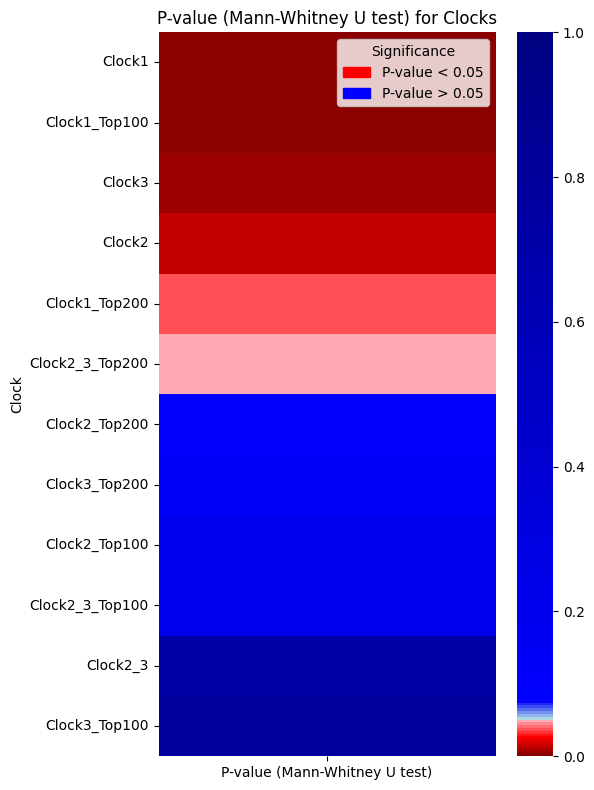

In [34]:
# create heatmap for the p-values of the clocks

# Define custom colormap with gradient from blue to red
cmap_colors = [(0, 'darkred'), (0.025, 'red'), (0.05, 'pink'), 
               (0.051, 'lightblue'), (0.075, 'blue'), (1, 'navy')]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

# Copy the p-values dataframe and set clock names as index
p_values_clocks_df = clocks_comparison_results_df[['P-value (Mann-Whitney U test)']].copy()
p_values_clocks_df.index = clocks_comparison_results_df['Clock']

# Adjust the figure size to accommodate all clock names if needed
plt.figure(figsize=(6, 8))
sns.heatmap(p_values_clocks_df, cmap=cmap, annot=False, fmt=".2f", cbar=True, vmin=0, vmax=1)

# Create a legend for the color gradient (p-value > 0.05 Blue, p-value < 0.05 Red)
red_patch = mpatches.Patch(color='red', label='P-value < 0.05')
blue_patch = mpatches.Patch(color='blue', label='P-value > 0.05')
plt.legend(handles=[red_patch, blue_patch], title='Significance', loc= 'best')

# Set the title and adjust layout
plt.title('P-value (Mann-Whitney U test) for Clocks')
plt.tight_layout()
plt.show()



#### 2.3 Compare the mean beta value of each CpG in the tissue specific datasets with the mean beta value of each CpG in the clocks (Mammals & Humans)  --- INCORRECT

2.3.1. Clocks (mammals) vs Tissue specific datasets (mammals)

In [47]:
clock1.shape, clock1_mean_var.shape, Blood_methylation_dataset.shape

((335, 15044), (335, 15046), (37554, 4555))

In [39]:
clock1_mean_var

,CpG,202897220093_R01C01,202897220093_R02C01,202897220093_R03C01,202897220093_R04C01,202897220093_R05C01,202897220093_R06C01,202897220093_R01C02,202897220093_R02C02,202897220093_R03C02,...,206139140103_R04C02,206139140103_R05C02,206139140103_R06C02,206139140104_R01C01,206139140104_R02C01,206139140104_R03C01,206139140104_R04C01,206139140104_R05C01,Mean,Variance
0,cg11728741,0.068117,0.067774,0.066174,0.068007,0.068168,0.066324,0.068542,0.067023,0.073910,...,0.103115,0.082374,0.109176,0.099880,0.101242,0.098242,0.093631,0.099830,0.139494,0.007246
1,cg24352905,0.036081,0.051498,0.053750,0.044476,0.052884,0.034006,0.038629,0.034521,0.041215,...,0.063619,0.055042,0.054033,0.067906,0.054027,0.054988,0.069833,0.068214,0.080312,0.002305
2,cg08938156,0.038598,0.035016,0.033070,0.039462,0.036047,0.038373,0.037440,0.034336,0.042841,...,0.170453,0.166092,0.125154,0.119996,0.150663,0.141750,0.187928,0.186769,0.197426,0.016917
3,cg13058338,0.044092,0.042869,0.055642,0.047772,0.048508,0.045878,0.049126,0.045214,0.050714,...,0.028211,0.029256,0.024757,0.032184,0.028561,0.029797,0.031891,0.028859,0.074434,0.007433
4,cg26067250,0.072081,0.073122,0.074480,0.076515,0.072465,0.072201,0.072929,0.072766,0.080162,...,0.087236,0.085740,0.080525,0.075837,0.090453,0.088125,0.094802,0.094790,0.091257,0.000856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,cg17365410,0.949280,0.950286,0.946264,0.944062,0.954354,0.951689,0.943590,0.951122,0.951580,...,0.949274,0.959640,0.953717,0.937889,0.945203,0.944948,0.954224,0.957957,0.936936,0.002905
331,cg15809488,0.071405,0.082365,0.075195,0.073777,0.073839,0.076681,0.078645,0.072687,0.077656,...,0.082504,0.078118,0.068469,0.082432,0.080795,0.092826,0.075604,0.078537,0.134111,0.006609
332,cg00694357,0.058747,0.052859,0.056952,0.062488,0.050765,0.051618,0.052079,0.049416,0.063725,...,0.133205,0.112218,0.132223,0.091681,0.115649,0.139849,0.102559,0.122644,0.057567,0.000233
333,cg13242392,0.054278,0.051756,0.064706,0.052663,0.060347,0.056305,0.049317,0.055827,0.055547,...,0.076804,0.070454,0.068034,0.072876,0.069123,0.071577,0.081968,0.081202,0.061396,0.000134


In [45]:
Blood_mean_var.iloc[:,:]

,CpG,202794570002_R01C02,202794570002_R03C02,202794570002_R04C02,202794570002_R05C02,202794570002_R06C01,202794570002_R06C02,202794570020_R01C01,202794570020_R01C02,202794570020_R02C01,...,205987790065_R04C02,205987790065_R05C01,205987790065_R05C02,205987790065_R06C01,205987790065_R06C02,206139140104_R01C02,206139140104_R02C02,206139140104_R06C01,Mean,Variance
0,cg00000165,0.480598,0.480727,0.471287,0.491907,0.470413,0.494566,0.481661,0.491640,0.480910,...,0.401268,0.364609,0.347046,0.355744,0.369246,0.486253,0.495817,0.494882,0.217164,0.028577
1,cg00001209,0.949652,0.920081,0.939281,0.882610,0.945128,0.936300,0.946920,0.938225,0.923380,...,0.825651,0.884960,0.877434,0.903645,0.887097,0.930023,0.867957,0.863826,0.885492,0.005695
2,cg00001364,0.893691,0.866378,0.903879,0.855325,0.894495,0.898212,0.884243,0.904272,0.892112,...,0.861802,0.893173,0.897086,0.889955,0.894398,0.853597,0.878107,0.871956,0.873732,0.014764
3,cg00001582,0.046624,0.050458,0.050236,0.053441,0.046996,0.049230,0.043981,0.050063,0.047062,...,0.054473,0.056021,0.055213,0.056673,0.058086,0.025566,0.036963,0.030652,0.049026,0.000291
4,cg00002920,0.112284,0.150901,0.133024,0.127054,0.129705,0.134837,0.138700,0.109279,0.142278,...,0.062335,0.056261,0.055913,0.063233,0.062313,0.498621,0.489322,0.506145,0.530168,0.095503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37549,rs9363764_II_F_C_37541,0.493235,0.482766,0.484120,0.498580,0.497062,0.498336,0.500621,0.493511,0.501958,...,0.490871,0.491680,0.492173,0.477409,0.513352,0.492368,0.495466,0.462430,0.447926,0.022000
37550,rs939290_II_F_C_37535,0.557094,0.539500,0.534311,0.548555,0.528250,0.539516,0.555038,0.559750,0.562682,...,0.503029,0.497442,0.507444,0.502575,0.496206,0.523383,0.515940,0.496514,0.487854,0.030591
37551,rs951295_I_F_C_37507,0.497131,0.496431,0.515023,0.494241,0.500000,0.492019,0.489759,0.501006,0.495864,...,0.488759,0.498497,0.477996,0.485193,0.479287,0.441208,0.446352,0.426978,0.447469,0.025671
37552,rs966367_II_F_C_37551,0.502601,0.497322,0.505302,0.493309,0.464286,0.490885,0.516049,0.496675,0.484289,...,0.485866,0.462358,0.510939,0.493083,0.471959,0.480694,0.483949,0.484415,0.498693,0.014036


In [53]:
Blood_mean_var.shape, clock1_mean_var.shape

((37554, 4557), (335, 15046))

!!!!!!!!!! WELCH HERE 

In [65]:
#### Welche's t-test for the mean methylation values between the complete dataset and the Blood dataset

# Perform Welch's t-test to assess the significance of the difference in mean methylation values between the complete dataset and the Blood dataset
t_statistic, p_value_welch = ttest_ind(complete_methylation_data['Mean'], Blood_mean_var['Mean'], equal_var=False)

# Print the results
print(f"Welch's t-test statistic: {t_statistic}, p-value: {p_value_welch}")

Welch's t-test statistic: -17.14489514055788, p-value: 9.176208063378804e-66


The negative sign on the t-statistic indicates that the mean of the first group is lower than the mean of the second group.
The large absolute value of the t-statistic (17.14) suggests a very large difference between the two group means.
The p-value associated with this t-statistic would be extremely small, likely less than 0.001. This means the probability of observing a difference this large or larger between the two group means, if the null hypothesis of equal means is true, is very low.

CONSIDER APPLYING IT TO COMPARISONS BETWEEN CLOCKS AND TISSUES (Possibly to the t-test with the filtered as well)

In [63]:
#### T-test between Clock1 and Blood

from scipy.stats import ttest_ind, levene

# filter the Blood dataset to have the same CpGs as Clock1
Blood_mean_var_filtered = Blood_mean_var[Blood_mean_var['CpG'].isin(clock1_mean_var['CpG'])]

# Test for similar variance
p_value_levene = levene(clock1_mean_var['Mean'], Blood_mean_var_filtered['Mean'])[1]

if p_value_levene < 0.05:
    print("The variances are not equal.")
else:
    # Perform t-test between Clock1 and Blood
    t_statistic, p_value_ttest = ttest_ind(clock1_mean_var['Mean'], Blood_mean_var_filtered['Mean'])
    t_statistic, p_value_ttest
    print(f"The p-value for the t-test between Clock1 and Blood is {p_value_ttest}")


The p-value for the t-test between Clock1 and Blood is 0.26836364445242394


In [55]:
Blood_mean_var_filtered.shape, clock1_mean_var.shape

((335, 4557), (335, 15046))

!!! THIS APPROACH IS INCORRECT, BUT RE-USE LOOP FOR WELCH'S and Filtered T-Test

In [34]:
### Compare the mean methylation values between the tissue-specific datasets and the clocks

# Clocks dataframes
clocks = [clock1, clock2, clock3, clock2_3, 
            clock_1_top100CpG, clock_2_top100CpG, clock_3_top100CpG, clock_2_3_top100CpG, 
            clock_1_top200CpG, clock_2_top200CpG, clock_3_top200CpG, clock_2_3_top200CpG
            ]
clock_names = ['Clock1', 'Clock2', 'Clock3', 'Clock2_3',
                'Clock1_Top100', 'Clock2_Top100', 'Clock3_Top100', 'Clock2_3_Top100',
                'Clock1_Top200', 'Clock2_Top200', 'Clock3_Top200', 'Clock2_3_Top200'
                ]

# Tissues
tissues = tissues_df['Tissue'].unique()

# Create an empty list to store comparison results
tissue_clocks_comparison_results = []

# Loop through each tissue-specific dataset
for tissue in tissues:
    for clock, clock_name in zip(clocks, clock_names):
        # Calculate the mean methylation value for each CpG site in the tissue-specific dataset
        tissue_mean = globals()['{}_mean_var'.format(tissue)]['Mean']
        
        # Calculate Pearson correlation coefficient between the mean methylation values of the clock dataset and the tissue-specific dataset
        correlation = globals()[f'{clock_name.lower()}_mean_var']['Mean'].corr(tissue_mean)
        # correlation = clock['Mean'].corr(tissue_mean)
        
        # Perform t-test to assess the significance of the difference in mean methylation values between the complete dataset and the tissue-specific dataset
        t_statistic, p_value_ttest = ttest_ind(globals()[f'{clock_name.lower()}_mean_var']['Mean'], tissue_mean)

        # Perform a wilcoxon rank-sum test to assess the significance of the difference in mean methylation values between the complete dataset and the tissue-specific dataset
        wilcoxon_stat, wilcoxon_p = wilcoxon(globals()[f'{clock_name.lower()}_mean_var']['Mean'], tissue_mean)
        
        # Perform Mann-Whitney U test to assess the significance of the difference in mean methylation values between the complete dataset and the tissue-specific dataset
        u_statistic, p_value_mannwhitneyu = mannwhitneyu(globals()[f'{clock_name.lower()}_mean_var']['Mean'], tissue_mean)
        
        # Append comparison results to the list
        tissue_clocks_comparison_results.append({'Clock': clock_name, 'Tissue': tissue, 
                                                 'Pearsons Correlation': correlation, 
                                                 'P-value (t-test)': p_value_ttest,
                                                 'Wilcoxon P-value': wilcoxon_p, 
                                                 'P-value (Mann-Whitney U test)': p_value_mannwhitneyu
                                                 })
        # tissue_clocks_comparison_results.append({'Clock': clock_name, 'Tissue': tissue, 'P-value (Mann-Whitney U test)': p_value_mannwhitneyu})

# Convert the list of dictionaries to a DataFrame
tissue_clocks_comparison_results_df = pd.DataFrame(tissue_clocks_comparison_results)

# sort by P-value (t-test) in ascending order
tissue_clocks_comparison_results_df.sort_values(by='P-value (Mann-Whitney U test)', ascending=True, inplace=True)

# Print or further analyze the comparison results
tissue_clocks_comparison_results_df

ValueError: The samples x and y must have the same length.

In [49]:
# count nans    
tissue_clocks_comparison_results_df.isnull().sum()

Clock                             0
Tissue                            0
P-value (Mann-Whitney U test)    36
dtype: int64

In [50]:
# list of tissues where the p-value is NaN
tissue_clocks_comparison_nan = tissue_clocks_comparison_results_df[tissue_clocks_comparison_results_df.isnull().any(axis=1)]
tissue_clocks_comparison_nan

,Clock,Tissue,P-value (Mann-Whitney U test)
84,Clock1,Testis,NaN
85,Clock2,Testis,NaN
86,Clock3,Testis,NaN
87,Clock2_3,Testis,NaN
88,Clock1_Top100,Testis,NaN
89,Clock2_Top100,Testis,NaN
90,Clock3_Top100,Testis,NaN
91,Clock2_3_Top100,Testis,NaN
92,Clock1_Top200,Testis,NaN
93,Clock2_Top200,Testis,NaN


In [51]:
# Remove NA values
tissue_clocks_comparison_results_df = tissue_clocks_comparison_results_df.dropna(inplace=False)

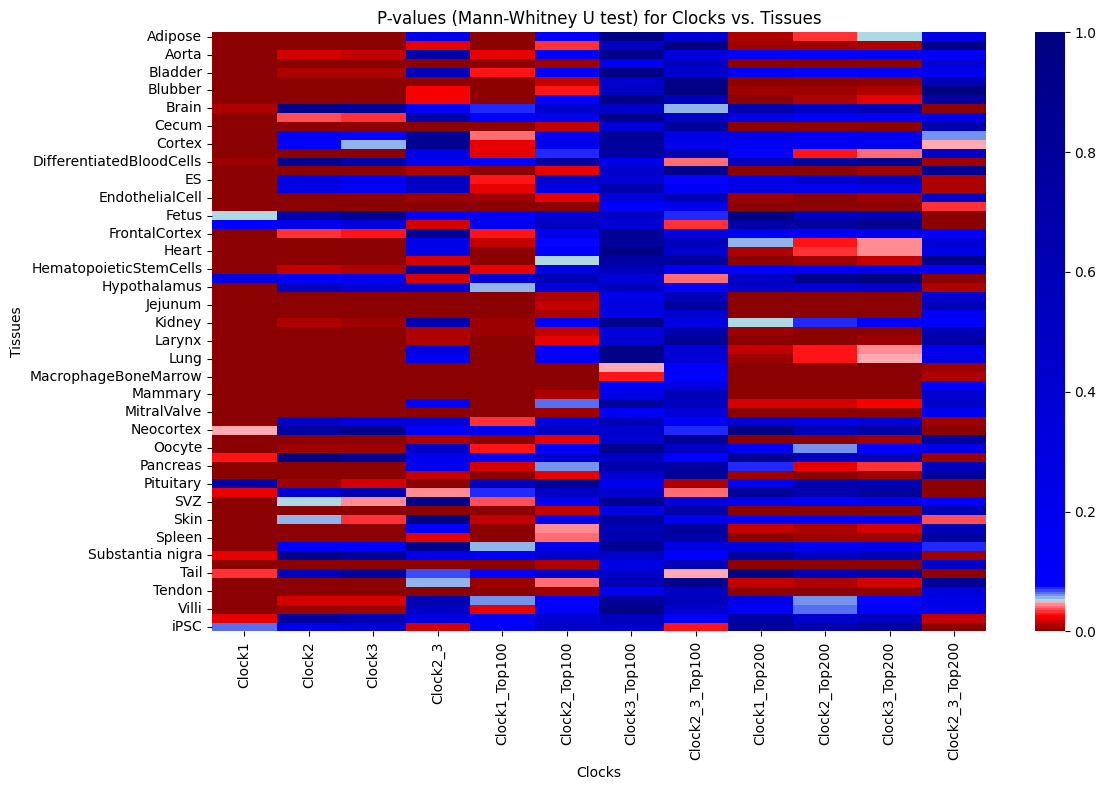

In [52]:
# Heatmap of clocks vs tissues

# Define custom colormap with gradient from blue to red
cmap_colors = [(0, 'darkred'), (0.025, 'red'), (0.05, 'pink'), 
               (0.051, 'lightblue'), (0.075, 'blue'), (1, 'navy')]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

# Define the order of clocks
clocks_order = ['Clock1', 'Clock2', 'Clock3', 'Clock2_3', 
                'Clock1_Top100', 'Clock2_Top100', 'Clock3_Top100', 'Clock2_3_Top100', 
                'Clock1_Top200', 'Clock2_Top200', 'Clock3_Top200', 'Clock2_3_Top200']

# Create a pivot table for the tissue_clocks_comparison_results_df
pivoted_df = tissue_clocks_comparison_results_df.pivot(index='Tissue', columns='Clock', values='P-value (Mann-Whitney U test)')
pivoted_df = pivoted_df.reindex(columns=clocks_order)

# Create a clustered heatmap with custom color map
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted_df, cmap=cmap, annot=False, fmt=".2g", cbar=True, vmin=0, vmax=1)
plt.title('P-values (Mann-Whitney U test) for Clocks vs. Tissues')
plt.xlabel('Clocks')
plt.ylabel('Tissues')
plt.tight_layout()
plt.show()



In [53]:
# Check tissues and clocks with significant p-values only
tissue_clocks_comparison_results_significant = tissue_clocks_comparison_results_df[tissue_clocks_comparison_results_df['P-value (Mann-Whitney U test)'] <= 0.05]
tissue_clocks_comparison_results_significant

,Clock,Tissue,P-value (Mann-Whitney U test)
157,Clock2,LymphNode,1.618428e-25
158,Clock3,LymphNode,1.057991e-24
685,Clock2,MacrophageBoneMarrow,2.661659e-20
156,Clock1,LymphNode,5.938806e-20
686,Clock3,MacrophageBoneMarrow,4.502766e-19
...,...,...,...
254,Clock3,SVZ,4.502081e-02
202,Clock3_Top200,Heart,4.687391e-02
636,Clock1,Neocortex,4.767254e-02
11,Clock2_3_Top200,Cortex,4.829623e-02


In [54]:
# Number of tissue groups for which clock1 was significantly different
clock1_significant = tissue_clocks_comparison_results_significant[tissue_clocks_comparison_results_significant['Clock'] == 'Clock1'].shape[0]
clock1_significant

62

In [55]:
# Number of tissue groups for which each clock was significantly different
clock_significant = []
for clock in clock_names:
    clock_significant.append({'Clock': clock, 'Significant Tissues': tissue_clocks_comparison_results_significant[tissue_clocks_comparison_results_significant['Clock'] == clock].shape[0]})
clock_significant_df = pd.DataFrame(clock_significant)
clock_significant_df

,Clock,Significant Tissues
0,Clock1,62
1,Clock2,46
2,Clock3,48
3,Clock2_3,31
4,Clock1_Top100,50
5,Clock2_Top100,26
6,Clock3_Top100,1
7,Clock2_3_Top100,6
8,Clock1_Top200,33
9,Clock2_Top200,36


In [56]:
significant_clock_tissue_pairs = tissue_clocks_comparison_results_significant[['Clock', 'Tissue']]
significant_clock_tissue_pairs

,Clock,Tissue
157,Clock2,LymphNode
158,Clock3,LymphNode
685,Clock2,MacrophageBoneMarrow
156,Clock1,LymphNode
686,Clock3,MacrophageBoneMarrow
...,...,...
254,Clock3,SVZ
202,Clock3_Top200,Heart
636,Clock1,Neocortex
11,Clock2_3_Top200,Cortex


#### 3. Clock 1 with the tissue specific datasets

In [155]:
### Filtering the tissue specific datasets by Clock CpGs

# Create a folder to store tissue-specific methylation datasets if it doesn't exist
folder_name = "Tissue Methylation Clocks"
os.makedirs(folder_name, exist_ok=True)

# Load the clocks
clocks = [clock1, clock2, clock3, clock2_3, 
          clock_1_top100CpG, clock_2_top100CpG, clock_3_top100CpG, clock_2_3_top100CpG, 
          clock_1_top200CpG, clock_2_top200CpG, clock_3_top200CpG, clock_2_3_top200CpG
          ]
clock_names = ['Clock1', 'Clock2', 'Clock3', 'Clock2_3', 
               'Clock1_Top100', 'Clock2_Top100', 'Clock3_Top100', 'Clock2_3_Top100', 
               'Clock1_Top200', 'Clock2_Top200', 'Clock3_Top200', 'Clock2_3_Top200'
               ]

# Create a dictionary to store the Clocks CpGs as index
clock_index = {}
for clock, name in zip(clocks, clock_names):
    clock_index[name] = pd.DataFrame(index=clock['CpG'])

# Split the Tissues df into tissue specific dataframes
tissues = tissues_df['Tissue'].unique()

# Create tissue-specific dataframes and filter through the complete methylation data
for tissue in tissues:
    # Create tissue-specific dataframe
    tissue_df = globals()['{}_methylation_dataset'.format(tissue)].copy()
    
    # Iterate over each clock
    for name, index_df in clock_index.items():
        # Filter the tissue-specific dataset to include only the CpGs associated with the current clock
        tissue_df_clock = tissue_df[tissue_df['CpG'].isin(index_df.index)]
        
        # Reindex the filtered dataframe to match the order of CpGs in the current clock
        tissue_df_clock = tissue_df_clock.set_index('CpG')
        tissue_df_clock = tissue_df_clock.reindex(index_df.index)  # Reindex using clock index
        tissue_df_clock.reset_index(inplace=True)  # Reset index to make CpG a column

        # Calculate and add the mean methylation and variance
        dask_df = dd.from_pandas(tissue_df_clock, npartitions=10)
        tissue_df_clock['Mean'] = dask_df.iloc[:, 1:].mean(axis=1).compute()
        tissue_df_clock['Variance'] = dask_df.iloc[:, 1:].var(axis=1).compute()
        
        # Save the tissue-specific methylation dataset as a CSV file 
        file_name = os.path.join(folder_name, "{}_methylation_dataset_{}_mean_var.csv".format(tissue, name))
        tissue_df_clock.to_csv(file_name, index=False)  # Save as CSV without index


KeyboardInterrupt: 

In [140]:
#### Load the tissue-specific clock filtered datasets from the saved CSV files (so the whole script can be run from here) !!!!!

folder_name = "Tissue Methylation Clocks"
tissue_clock_files = os.listdir(folder_name)

# Load each CSV file into its own dataframe
for file in tissue_clock_files:
    # Extract tissue and clock names from file name
    tissue, clock = file.split("_")[0], file.split("_")[3]
    
    # Load CSV file into dataframe
    file_path = os.path.join(folder_name, file)
    globals()['{}_methylation_dataset_{}_mean_var'.format(tissue, clock)] = pd.read_csv(file_path)


In [150]:
Adipose_methylation_dataset_Clock2_mean

,CpG,203203210013_R05C01,203203210017_R05C02,203203210030_R01C01,203203210030_R01C02,203203210030_R02C01,203203210030_R03C01,203203210030_R03C02,203203210030_R04C01,203203210030_R04C02,...,206116820056_R04C01,206116820071_R03C02,206139140057_R03C02,206139140057_R04C01,206139140063_R02C01,206139140092_R02C02,206139140092_R06C02,206139140106_R05C02,Mean,Variance
0,cg05474883,0.967787,0.965058,0.960515,0.958202,0.964942,0.969757,0.956570,0.968002,0.965260,...,0.955018,0.947054,0.961925,0.958270,0.960123,0.952357,0.955734,0.962716,0.948644,0.000636
1,cg09710440,0.260649,0.207191,0.152254,0.152658,0.205091,0.134413,0.231640,0.208530,0.159611,...,0.163344,0.177808,0.168726,0.189349,0.175047,0.186948,0.165064,0.170527,0.179798,0.001723
2,cg26512254,0.073754,0.062166,0.041242,0.040264,0.049880,0.040293,0.037047,0.058583,0.053207,...,0.066706,0.065892,0.063513,0.053050,0.071285,0.054284,0.057964,0.070856,0.053566,0.000641
3,cg08681110,0.022701,0.020980,0.022035,0.022191,0.019724,0.020438,0.024534,0.023120,0.019080,...,0.017279,0.016648,0.018890,0.018031,0.017843,0.017909,0.017377,0.018988,0.023434,0.000061
4,cg09227056,0.315769,0.319297,0.230728,0.228475,0.258667,0.219061,0.188994,0.288782,0.299606,...,0.299890,0.301869,0.349780,0.304242,0.319438,0.352953,0.285946,0.317997,0.278930,0.004012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,cg21608448,0.714036,0.677009,0.578647,0.625604,0.677430,0.681237,0.699836,0.592609,0.612445,...,0.795538,0.776578,0.781721,0.781272,0.801147,0.773551,0.801074,0.792480,0.682120,0.009810
196,cg14991111,0.903109,0.901746,0.891669,0.898467,0.896614,0.899032,0.901996,0.898397,0.903641,...,0.886224,0.897591,0.904885,0.900738,0.901574,0.902285,0.895542,0.904222,0.881425,0.000411
197,cg01090334,0.945601,0.959615,0.832872,0.953812,0.958575,0.818761,0.955563,0.800134,0.949037,...,0.811319,0.798807,0.781679,0.799427,0.761455,0.774876,0.843034,0.842029,0.820756,0.011609
198,cg25694286,0.984908,0.983546,0.979411,0.983651,0.984644,0.984780,0.984923,0.983145,0.982458,...,0.980881,0.985310,0.972620,0.977028,0.977885,0.976337,0.982059,0.985038,0.979362,0.000081


In [ ]:
# Calculate and add the variance to all the tissue specific filtered datasets


##### FROM HERE - make a loop to add variance to all the filtered tissue specific datasets



In [149]:
# Calculate variance of Adipose_methylation_dataset_Clock2 and add it to the dataframe

# Calculate variance of Adipose_methylation_dataset_Clock2 and add it to the dataframe
variance = Adipose_methylation_dataset_Clock2.iloc[:, 1:-1].var(axis=1)
Adipose_methylation_dataset_Clock2['Variance'] = variance

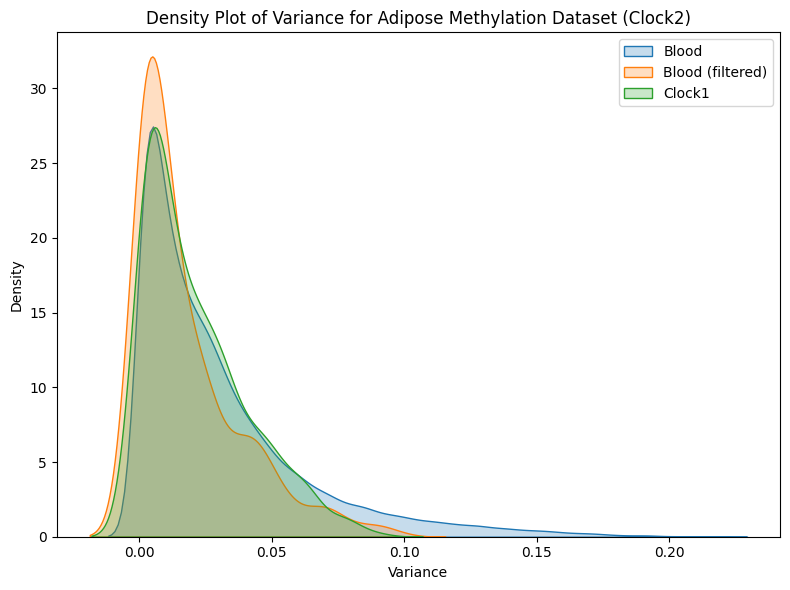

In [60]:
# Density plot for Adipose_methylation_dataset_Clock2 

plt.figure(figsize=(8, 6))
sns.kdeplot(data=Blood_mean_var['Variance'], fill=True)
sns.kdeplot(data=Blood_mean_var_filtered['Variance'], fill=True)
sns.kdeplot(data=clock1_mean_var['Variance'], fill=True)
plt.title('Density Plot of Variance for Adipose Methylation Dataset (Clock2)')
plt.xlabel('Variance')
plt.ylabel('Density')
plt.legend(['Blood', 'Blood (filtered)', 'Clock1'])
plt.tight_layout()
plt.show()



#### 3.1. Calculate descriptive statistics of each tissue dataset and clock

Tissue-Specific Analysis:

    Analyze DNA methylation patterns separately for each tissue type. This may involve:
        Computing descriptive statistics (e.g., mean, median methylation levels) for the aging-related CpGs within each tissue group.
        Visualizing methylation patterns using heatmaps, boxplots, or other appropriate plots to identify tissue-specific methylation signatures associated with aging.
        Performing statistical tests (e.g., t-tests, ANOVA) to compare methylation levels between different tissue types for each aging-related CpG.




Comparison of Aging Clocks:

    Compare the aging clocks (i.e., patterns of methylation associated with aging) across different tissue types.
    This can be done by visualizing the methylation levels of the aging-related CpGs for each tissue type and comparing them to the overall aging pattern observed in the full dataset.
    Use statistical tests or clustering techniques to assess similarities or differences in aging signatures between tissues.

    Visualizing Methylation Levels:
        Plot the methylation levels of aging-related CpGs for each tissue type. You can use boxplots, violin plots, or heatmaps to visualize the distribution of methylation levels across samples within each tissue type.
        Arrange the aging-related CpGs along the x-axis and the methylation levels on the y-axis. Each boxplot or violin plot represents a tissue type.

    Comparing to Overall Aging Pattern:
        Overlay the overall aging pattern observed in the full dataset onto the plots of tissue-specific methylation levels. This can be done by plotting the average methylation levels of aging-related CpGs across all samples in the full dataset as a reference.
        Alternatively, you can compare the tissue-specific methylation levels to a reference sample (e.g., a young or old sample) to visualize the differences in aging signatures between tissues.

    Statistical Tests:
        Use statistical tests (e.g., t-tests, ANOVA) to compare the average methylation levels of aging-related CpGs between tissue types.
        Assess whether there are significant differences in methylation levels between tissues for each aging-related CpG.
        Adjust for multiple comparisons if necessary to control the false discovery rate.

    Clustering Analysis:
        Perform clustering analysis on the methylation profiles of aging-related CpGs within each tissue type.
        Use clustering techniques such as hierarchical clustering or k-means clustering to identify groups of samples with similar methylation patterns.
        Compare the resulting clusters between tissue types to assess similarities or differences in aging signatures.

    Dimensionality Reduction:
        Apply dimensionality reduction techniques such as principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE) to visualize the high-dimensional methylation data in a lower-dimensional space.
        Plot the PCA or t-SNE embeddings colored by tissue type to visualize the distribution of samples and identify any clusters or patterns related to aging.

    Interpretation:
        Interpret the results of the comparison by identifying tissue-specific differences in aging signatures and assessing their biological relevance.
        Consider the functional implications of the observed methylation patterns and their potential relationship to tissue-specific aging processes.

    Validation:
        Validate the findings using independent datasets or by comparing them to existing literature on tissue-specific aging processes.
        Ensure that the observed differences in aging signatures between tissue types are robust and reproducible across different datasets or experimental conditions.

By following these steps, you can effectively compare aging clocks across different tissue types and gain insights into tissue-specific methylation patterns associated with aging.